# 模型搭建

### 读取数据

In [1]:
import pandas as pd
df = pd.read_excel('信用卡精准营销模型.xlsx')
df.head()

,年龄,月收入（元）,月消费（元）,性别,月消费/月收入,响应
0,30,7275,6062,0,0.833265,1
1,25,17739,13648,0,0.769378,1
2,29,25736,14311,0,0.556069,1
3,23,14162,7596,0,0.536365,1
4,27,15563,12849,0,0.825612,1


### 提取特征变量和目标变量

In [2]:
X = df.drop(columns='响应') 
y = df['响应']

### 划分训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 模型训练

In [4]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=123)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=123)

# 模型预测及评估

In [5]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1]


In [6]:
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


### 查看预测准确度

In [7]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.85


### 查看预测分类概率

In [8]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[0:5] 

array([[0.19294615, 0.80705385],
       [0.41359387, 0.58640613],
       [0.42597039, 0.57402961],
       [0.66817389, 0.33182611],
       [0.32850159, 0.67149841]])

### 绘制ROC曲线

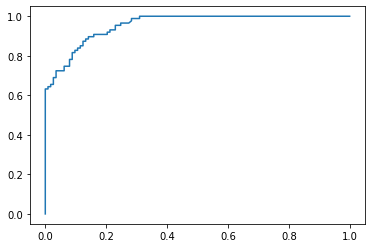

In [9]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

### 查看AUC值

In [10]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.9559047909673483


### 查看特征重要性

In [11]:
clf.feature_importances_

array([0.18, 0.2 , 0.36, 0.02, 0.24])

In [12]:
features = X.columns
importances = clf.feature_importances_ 

importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
2,月消费（元）,0.36
4,月消费/月收入,0.24
1,月收入（元）,0.20
0,年龄,0.18
3,性别,0.02
